<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/febuary_2023/Feb2023_EggPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Egg Prices & Python


---

According to the WSJ, the Avian-flu outbreak keeps supply of the grocery staple tight as inflation rises *Egg Prices Have Soared 60% in a Year. Here Is Why They Are So Expensive.
*

The price of eggs rose more than any other grocery item in 2022, according to Information Resources Inc. Wholesale prices of Midwest large eggs hit a record `$5.46` a dozen in December, according to the research firm Urner Barry, and have declined to `$3.77` a dozen this month after holiday-driven demand eased. In mid-January 2022, wholesale prices of Midwest large eggs were `$1.30` a dozen. 

The data comes from [FRED](https://fred.stlouisfed.org/series/APU0000708111)

Let's see the data! 



In [187]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

In [189]:
eggs = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_4/data/egg_prices_to2022.csv")
# -- rename columns 
eggs.columns = ["date","price"]
# -- convert date to datetime 
eggs["date"] = pd.to_datetime(eggs["date"])

# -- eyeball first 5 records
eggs.head()

,date,price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812
3,1980-04-01,0.797
4,1980-05-01,0.737


# Summary Statistics 

In [190]:
summary_stat = (eggs
                .describe()
                .reset_index()
                .rename(columns={"index":"stat"})
)
              
summary_stat

,stat,price
0,count,516.000000
1,mean,1.297062
2,std,0.508144
3,min,0.678000
4,25%,0.902750
5,50%,1.099000
6,75%,1.627250
7,max,4.250000


# Boxplot

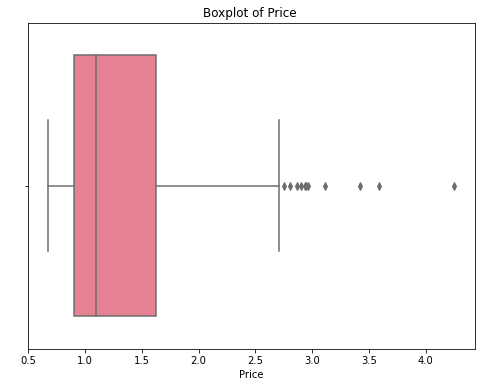

In [191]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a boxplot of the 'price' column
sns.boxplot(x=eggs['price'])

# Add a title to the plot
plt.title("Boxplot of Price ")

# Add labels to the x and y axis
plt.xlabel("Price")
plt.ylabel(" ")

# Show the plot
plt.show()

# Histogram

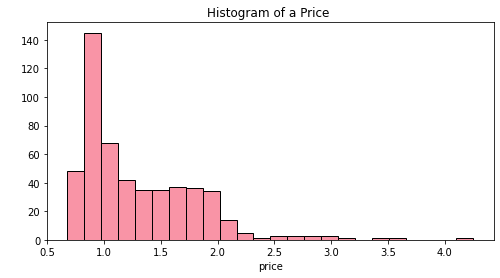

In [192]:

# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a histogram of column
sns.histplot(x=eggs['price'], 
             bins = 24)

# Add a title to the plot
plt.title("Histogram of a Price ")

# Add labels to the x and y axis
plt.xlabel("price")
plt.ylabel(" ")

# Show the plot
plt.show()

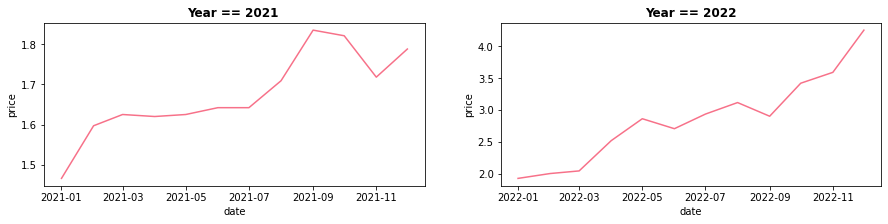

In [193]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

eggs["year"] = eggs["date"].dt.year

# create histograms assign the axes 
sns.lineplot(data=eggs.query('year == 2021'),
    x='date', 
    y='price',
             ax = axes[0])

sns.lineplot(data=eggs.query('year == 2022'),
    x='date', 
    y='price',
             ax = axes[1])

# title the axes 
axes[0].set_title('Year == 2021 ', 
             fontweight ="bold")
axes[1].set_title('Year == 2022', 
             fontweight ="bold")
# show
plt.show()

## Boxplot 2020, 2021 and 2022



---
Let's compare 2020, 2021 and 2022. to do this we need to create a new column "year" and we'll make a boxplot
1. create new column "year"
2. plot the boxplot hue by year



In [154]:
eggs.dtypes

date     datetime64[ns]
price           float64
year              int64
dtype: object

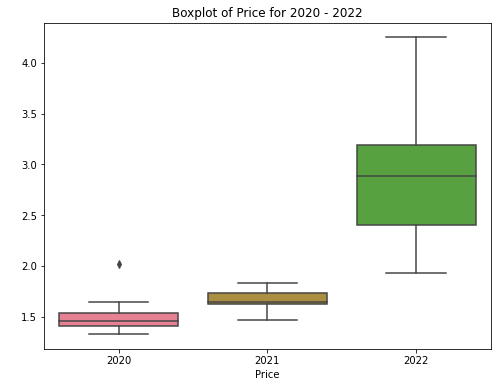

In [194]:
eggs["year"] = eggs["date"].dt.year
eggs.head()
res1 = eggs.query('year == [2020,2021,2022]')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a boxplot of the 'price' column
sns.boxplot(data= res1, y='price', x="year")

# Add a title to the plot
plt.title("Boxplot of Price for 2020 - 2022")

# Add labels to the x and y axis
plt.xlabel("Price")
plt.ylabel(" ")

# Show the plot
plt.show()

# Line Plots

1. 1980 - 2022 

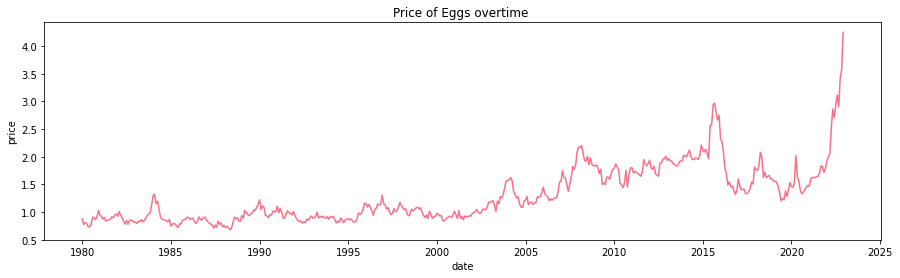

In [195]:
# Set the figure size
plt.figure(figsize=(15, 4))
# Plot a histogram of column
sns.lineplot(data = eggs, 
             x='date', 
             y="price"
            )
# Add a title to the plot
plt.title("Price of Eggs overtime ")

# Add labels to the x and y axis
plt.xlabel("date")
plt.ylabel("price")

# Show the plot
plt.show()

## Prices 2020 - 2022

---



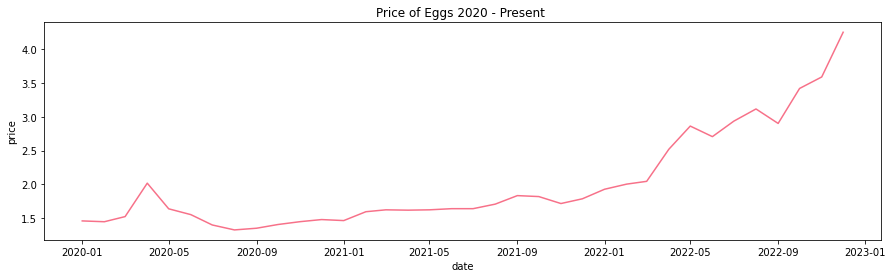

In [196]:
# Set the figure size
plt.figure(figsize=(15, 4))
# Plot a histogram of column
sns.lineplot(data = eggs.query('year >=2020'), 
             x='date', 
             y="price"
            )
# Add a title to the plot
plt.title("Price of Eggs 2020 - Present ")

# Add labels to the x and y axis
plt.xlabel("date")
plt.ylabel("price")

# Show the plot
plt.show()

## Investing In Eggs? 

So if you had the abilty to invest $1 in eggs in January and hold it until December when you sell. Would that be a profitable investment strategy? 

Essentially, we are simply look at the growth of a dollars worth eggs at the start of each year and see how the $1 investment changes from January to December. 


---

Yes this is an odd analysis but it likely highlights the impact of inflation each year on a carton of eggs. Think of this as if eggs were an investment like a stock. If you invested a $1 in an egg at the beggining of each year to see how your investment grew over the year. 

To do this we need to
1. normalize the price of eggs so that the first day of january the price is a dollar. 
2. create a month name value so we can plot them along the same x-axis
3. filter for the years of interest
4. plot the growth of a $1 egg investment over the year. 




In [198]:
# group the data by 'group' and divide the 'value' column by the first value of each group
eggs['normalized_price'] = eggs.groupby('year')['price'].transform(lambda x: x / x.iloc[0])
# get the month number and name
eggs["month_no"] = eggs["date"].dt.month
eggs["month_name"] = eggs["date"].dt.month_name()
# did it work? 
eggs.head()

,date,price,year,normalized_price,month_no,month_name
0,1980-01-01,0.879,1980,1.000000,1,January
1,1980-02-01,0.774,1980,0.880546,2,February
2,1980-03-01,0.812,1980,0.923777,3,March
3,1980-04-01,0.797,1980,0.906712,4,April
4,1980-05-01,0.737,1980,0.838453,5,May


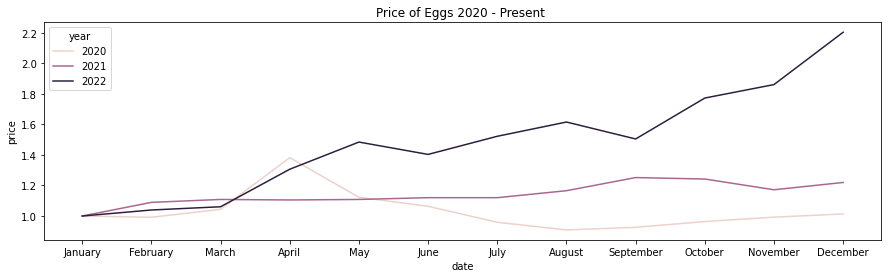

In [199]:
# Set the figure size
plt.figure(figsize=(15, 4))
# set palette
sns.set_palette("husl")
# Plot a histogram of column
sns.lineplot(data = eggs.query('year >= 2020'), 
             x='month_name', 
             y="normalized_price",
             hue = "year",

            )
# Add a title to the plot
plt.title("Price of Eggs 2020 - Present ")

# Add labels to the x and y axis
plt.xlabel("date")
plt.ylabel("price")

# Show the plot
plt.show()

## If you invested one-dollar in eggs begging of 2022? 

How much would your investment be worth at end of 2022?

---





In [200]:
december_price = eggs.query('year >= 2022 and month_no == 12')["normalized_price"].values[0]
print('A $1 investment in eggs in January would be worth ${:.2f} at end of 2022 \n'.format(december_price))



A $1 investment in eggs in January would be worth $2.20 at end of 2022 



In [201]:
for year in [2019,2020,2021,2022]:
  december_price = eggs.query('year >= @year and month_no == 12')["normalized_price"].values[0]
  print('A $1 investment in eggs in January would be worth ${:.2f} by December of {}'.format(december_price, year))



A $1 investment in eggs in January would be worth $0.99 by December of 2019
A $1 investment in eggs in January would be worth $1.01 by December of 2020
A $1 investment in eggs in January would be worth $1.22 by December of 2021
A $1 investment in eggs in January would be worth $2.20 by December of 2022


In [208]:
profit = 0
for year in list(range(2010,2023)):
  december_price = eggs.query('year >= @year and month_no == 12')["normalized_price"].values[0]
  profit = profit + (december_price - 1)
  print('A $1 egg investment in January would be worth ${:.2f} by December of {} a profit of ${:.2f}'.format(december_price, year, december_price - 1))

print('Profit of our strategy {}'.format(profit))

A $1 egg investment in January would be worth $1.00 by December of 2010 a profit of $0.00
A $1 egg investment in January would be worth $1.04 by December of 2011 a profit of $0.04
A $1 egg investment in January would be worth $1.04 by December of 2012 a profit of $0.04
A $1 egg investment in January would be worth $1.05 by December of 2013 a profit of $0.05
A $1 egg investment in January would be worth $1.10 by December of 2014 a profit of $0.10
A $1 egg investment in January would be worth $1.30 by December of 2015 a profit of $0.30
A $1 egg investment in January would be worth $0.59 by December of 2016 a profit of $-0.41
A $1 egg investment in January would be worth $1.14 by December of 2017 a profit of $0.14
A $1 egg investment in January would be worth $0.90 by December of 2018 a profit of $-0.10
A $1 egg investment in January would be worth $0.99 by December of 2019 a profit of $-0.01
A $1 egg investment in January would be worth $1.01 by December of 2020 a profit of $0.01
A $1 eg

## Forecasting w. ARIMA 

Where are egg prices headed? 


---

let's use an ARIMA model! ARIMA stands for **AutoRegressive Integrated Moving Average**, and it's a statistical model used for time series forecasting.

The basic idea behind ARIMA is to model the past values of a time series in order to make predictions about future values. ARIMA does this by combining three components:

- Autoregression (AR): This component models the relationship between the current value of a time series and its past values. For example, if the value of a time series at time t is influenced by the values at times t-1, t-2, t-3, and so on, this relationship is modeled by the AR component.

- Integration (I): This component is used to handle non-stationary time series data, where the mean and/or variance of the data changes over time. The integration component transforms the time series data into a stationary time series, which makes it easier to model.

- Moving Average (MA): This component models the relationship between the current value of a time series and the residuals (or errors) from the previous time steps. The residuals represent the difference between the observed values and the values predicted by the AR component. The MA component helps to capture any patterns in the residuals that are not captured by the AR component.

The order of the ARIMA model (e.g. ARIMA(p, d, q)) refers to the order of the **AR** component(p), the order of the **I**component(d), and the order of the **MA** component(q). You can tune the model by using different combinations of p, d, and q to find the best model that fits the data.


We will use  Mean Absolute Error (MAE) as a evaluation metric. It measures the difference between the **actual values** of the time series and the **predicted values**. It's defined as the **average absolute difference** between the actual and predicted values.

In other words, MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. This makes MAE a robust metric, as it's not affected by the presence of outliers in the data.



In [214]:
from statsmodels.tsa.arima.model import ARIMA

ts_data  = eggs.query('year > 2018')[["date","price"]].set_index('date')

# Fit an ARIMA model
# -- change these and see the impact on MAE
p = 1
d = 1
q = 1
model = ARIMA(ts_data, order=(p,d,q), freq='MS')
model_fit = model.fit()
print("model has a mean_absolute_error of {:.4f}".format(model_fit.mae))



model has a mean_absolute_error of 0.1564


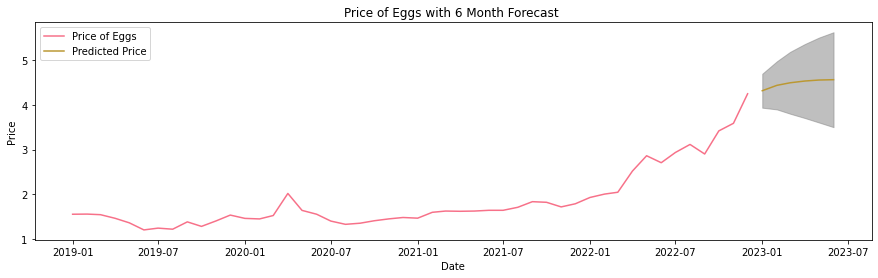

In [210]:
# Forecast the next k periods into the future
k = 6
forecast = model_fit.get_forecast(steps=k)
forecast_conf = forecast.conf_int()

prediction = pd.DataFrame(forecast.predicted_mean).reset_index().rename(columns={"index":"date"})
# plot this 
plt.figure(figsize=(15, 4))
sns.lineplot(data=ts_data,x="date",y="price", label="Price of Eggs")
sns.lineplot(data=prediction,x="date",y="predicted_mean", label="Predicted Price")

# goofy range of confidence interval
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='gray', alpha=0.5)

plt.legend(loc='upper left')
# Add a title to the plot
plt.title("Price of Eggs with 6 Month Forecast ")

# Add labels to the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.show()


In [186]:
prediction

,date,predicted_mean
0,2023-01-01,4.318142
1,2023-02-01,4.438400
2,2023-03-01,4.495710
3,2023-04-01,4.534766
4,2023-05-01,4.557288
5,2023-06-01,4.564924
